In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import platform
from matplotlib import rc
import logging

logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

# ✅ 한글 폰트 설정

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
else:
    rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [31]:
def findTrend(trend_keywords: list):
    try:
        pytrends.build_payload(trend_keywords, timeframe='today 3-m', geo='KR')

        df = pytrends.interest_over_time()
        return df.drop(columns=["isPartial"], errors='ignore')
    except Exception as e:
        print(f"데이터 요청 중 오류 발생: {e}")
        return pd.DataFrame()

In [32]:
def getCategories():
    ky_list = input("알고싶은 유튜브 카테고리를 적어주세요 (여러개는 ,로 구분): ").split(',')
    return [k.strip() for k in ky_list]

In [37]:
def showGraph(model, forecast, keyword, real_df):
    plt.figure(figsize=(12, 6))
    plt.plot(real_df.index, real_df[keyword], 'o', label='실제값', color='black')
    model.plot(forecast, ax=plt.gca())
    plt.title(f"{keyword} 검색 트렌드 예측 (향후 7일)")
    plt.xlabel("날짜")
    plt.ylabel("검색 인기도")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/Users/kimminje/PyCharmMiscProject/.venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


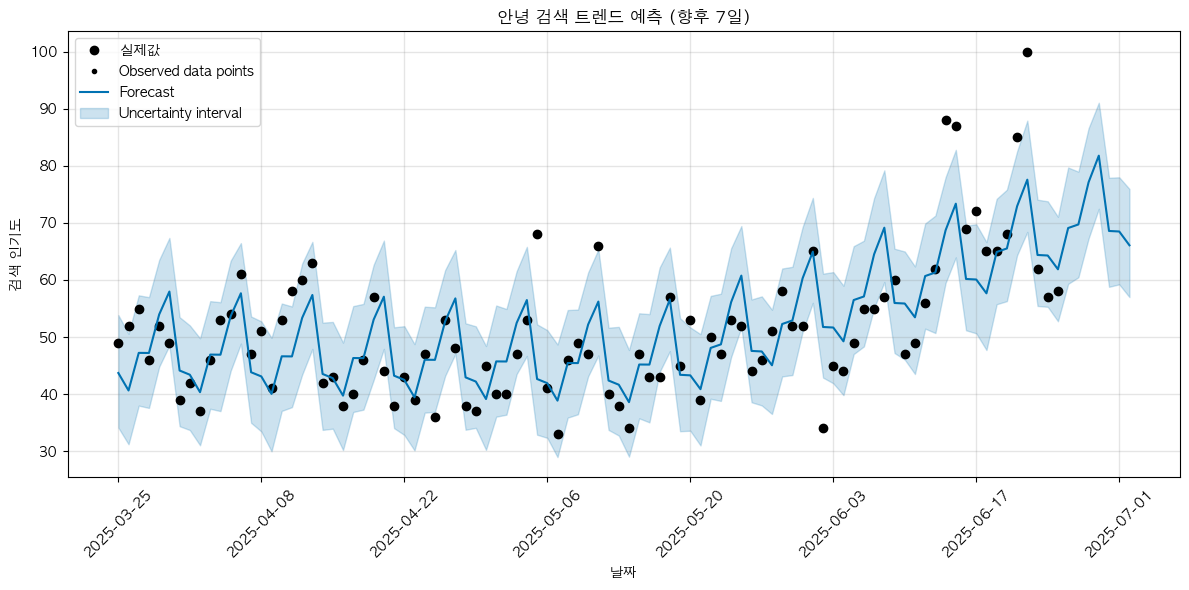

In [39]:
pytrends = TrendReq(hl='ko', tz=540, requests_args={'headers': {'User-Agent': 'Mozilla/5.0'}})

keywords = getCategories()

for keyword in keywords:
    df = findTrend([keyword])
    if df.empty:
        print(f"[{keyword}] 데이터가 없어 예측할 수 없습니다.")
        continue

    # Prophet 형식으로 변환
    prophet_df = df[[keyword]].reset_index()
    prophet_df.columns = ['ds', 'y']

    model = Prophet(
      growth = 'logistic',# 비선형 추세 사용
      weekly_seasonality = True # 주간 계절성 활성화
    )



    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    # 그래프 출력
    showGraph(model, forecast, keyword, df)

## Prophet에서 사용하는 알고리즘 모듈
$$
y(t) = g(t) + s(t) + h(t) + \epsilon_t
$$
 + g(t) : 추세 함수<br />
 + s(t) : 계절성 함수<br />
 + h(t) : 휴일 함수<br />
 + $  \epsilon_t $ :노이즈

## 추세 함수
$$ g(t) = (k + a(t)^T \delta) \cdot t + (m + a(t)^T \gamma) $$

## 계절성 함수

## 휴일 함수

## 노이즈
